# **Image classification of clothes**

---
IA-1, BATCH-2, GROUP-12

Dataset: **Fashion-MNIST**

https://www.kaggle.com/zalando-research/fashionmnist

**Members**

(1) Esha Gupta - 1814025

(2) Riya Joshi - 1814028







Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd

import itertools

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Deep learning libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical,plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

**Importing and loading train and test datasets**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Load training and test data into dataframes
train = pd.read_csv('/content/drive/My Drive/oet-aml/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/My Drive/oet-aml/fashion-mnist_test.csv')

In [ ]:
# Displaying first five rows of train dataset
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Displaying first five rows of test dataset
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


**Exploring the dataset**

In [ ]:
# Shapes of train and test datasets
print("Shape of train dataset: ",train.shape)
print("Shape of test dataset: ",test.shape)

Shape of train dataset:  (60000, 785)
Shape of test dataset:  (10000, 785)


* **Label**: The Target variable.
* **Pixels**: The smallest unit of a Digital Image or Graphic that can be displayed on Digital Display Device.

In [ ]:
# Displaying column names of the train dataset
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

**Defining Global variables**

In [ ]:
rows = 10
columns = 10
IMG_ROWS=28
IMG_COLS=28

**LABELS**

The images in the train and test datasets are classified into 10 categories which are:

* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot




In [ ]:
# Displaying different labels
train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

**Category wise distribution of images of train dataset**

In [ ]:
total_classes= len(labels)

def get_classes_distribution(data):
    # get label count
    label_counts = data['label'].value_counts()
    # get total no of samples
    total_samples = len(data)
    # counting the number of images of each label
    for i in range(total_classes):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count/total_samples)*100
        print("{:<20s}:    {} or {}%".format(label, count, percent))
get_classes_distribution(train)

Ankle Boot          :    6000 or 10.0%
Bag                 :    6000 or 10.0%
Sneaker             :    6000 or 10.0%
Shirt               :    6000 or 10.0%
Sandal              :    6000 or 10.0%
Coat                :    6000 or 10.0%
Dress               :    6000 or 10.0%
Pullover            :    6000 or 10.0%
Trouser             :    6000 or 10.0%
T-shirt/top         :    6000 or 10.0%


**Category wise distribution of images of test dataset**

In [ ]:
get_classes_distribution(test)

Sneaker             :    1000 or 10.0%
Shirt               :    1000 or 10.0%
Sandal              :    1000 or 10.0%
Coat                :    1000 or 10.0%
Dress               :    1000 or 10.0%
Pullover            :    1000 or 10.0%
Ankle Boot          :    1000 or 10.0%
Trouser             :    1000 or 10.0%
Bag                 :    1000 or 10.0%
T-shirt/top         :    1000 or 10.0%


**Plotting category wise distribution of images of train dataset**

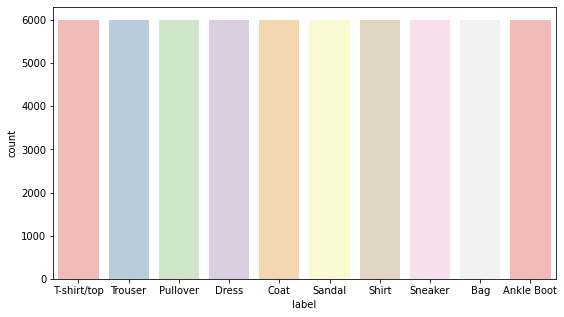

In [ ]:
plt.figure(figsize=(9,5))
ax= sns.countplot(x='label',data=train,palette='Pastel1')
xtickslocs = ax.get_xticks()
plt.xticks(ticks=xtickslocs, labels=labels.values())
plt.show()

**Plotting images from the train dataset**

* **imshow()**: It is used to display data as an image, i.e. on a 2D regular raster.
* **numpy.ravel()** : It is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
* **np.squeeze()** : It is used when we want to remove single-dimensional entries from the shape of an array.

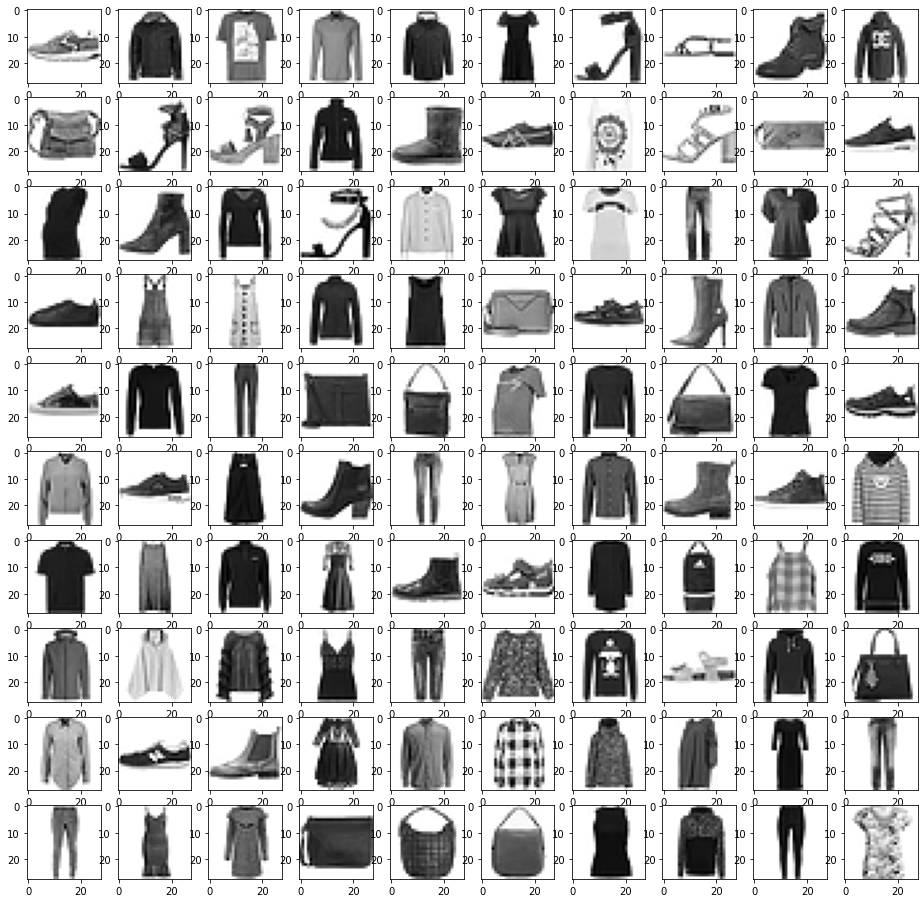

In [ ]:
fig,ax = plt.subplots(rows,columns,figsize = (16,16))
ax = ax.ravel()
for i in range(0,rows*columns):
    index = np.random.randint(0, len(train))
    img = train.iloc[index,1:]
    img = np.array(img)
    ax[i].imshow(np.squeeze(img.reshape(28,28,1)),cmap=plt.cm.binary)

**Splitting train dataset into X_train and Y_train**

In [ ]:
X_train = np.array(train.iloc[:, 1:]) # independent features
Y_train = to_categorical(np.array(train.iloc[:, 0])) # dependent feature(labels)

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

**Splitting test dataset into X_test and Y_test**

In [ ]:
X_test = np.array(test.iloc[:, 1:]) # independent features
Y_test = to_categorical(np.array(test.iloc[:, 0])) # dependent feature(labels)

In [ ]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Splitting the train dataset into train and validate for building our model**

test_size 0.2 means 20% of the data will be used for testing and 80% for training.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=123)

In [ ]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

X_train shape:  (48000, 28, 28, 1)
y_train shape:  (48000, 10)


In [ ]:
print("X_val shape: ",X_val.shape)
print("y_val shape: ",y_val.shape)

X_val shape:  (12000, 28, 28, 1)
y_val shape:  (12000, 10)


**Normalizing images**

Data normalization is an important step which ensures that each input pixel  has a similar data distribution. We choose to scale the normalized data in the range [0,1] by dividing each pixel value by 255.

In [ ]:
# Normalizing the training images
X_train = X_train.reshape(X_train.shape[0], IMG_ROWS, IMG_COLS, 1)
X_train = X_train.astype('float32')
X_train /= 255

In [ ]:
# Normalizing the test images
X_test = X_test.reshape(X_test.shape[0], IMG_ROWS, IMG_COLS, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [ ]:
# Normalizing the validation images
X_val = X_val.reshape(X_val.shape[0], IMG_ROWS, IMG_COLS, 1)
X_val = X_val.astype('float32')
X_val /= 255

**Building the model using CNN**

* **Sequential model** : is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at init stage. The layers added are as follows:

* **Conv2D** : is a 2D Convolutional layer (i.e. spatial convolution over images).

* **Number of Filters** : 32

* **kernel_size** : (3 x 3)
 
* **Activation function** : relu
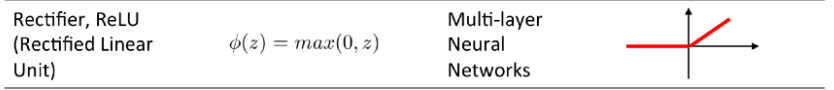

* **kernel_initializer** : the function used for initializing the kernel

* **input_shape** : is the shape of the image presented to the CNN: in our case is 28 x 28 

* **MaxPooling2D** : When added to a model, max pooling reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer.


* **Flatten** : This layer Flattens the input. Does not affect the batch size. It is used without parameters.

* **Dense** : This layer is a regular fully-connected NN layer. It is used without parameters.

* The input and output of the Conv2D is a 4D tensor.


Buidling model with 2 layers

In [ ]:
# 2layers
model = Sequential()
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

**Compile the model**

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

**Displaying summary report of the model**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
batch_normalization_7 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)       

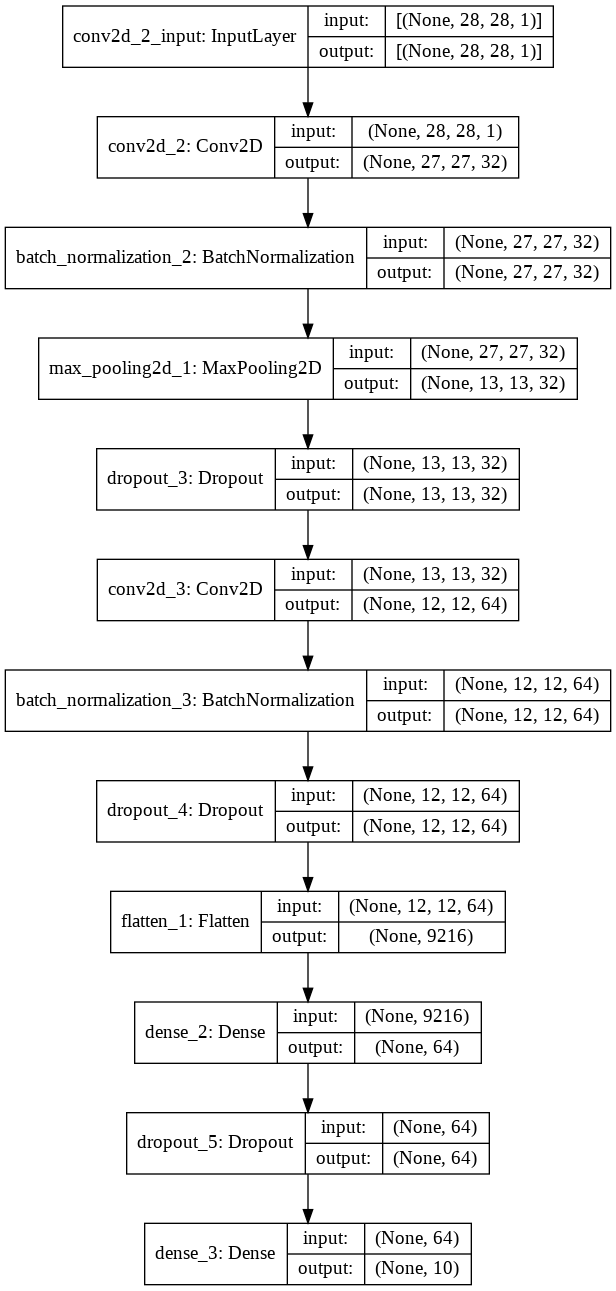

In [ ]:
plot_model(model,show_shapes=True)

**Training the model**

In [ ]:
model_trained = model.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
188/188 [==============================] - 74s 389ms/step - loss: 0.8045 - accuracy: 0.7355 - val_loss: 2.6798 - val_accuracy: 0.2447
Epoch 2/10
188/188 [==============================] - 73s 388ms/step - loss: 0.3707 - accuracy: 0.8650 - val_loss: 1.4791 - val_accuracy: 0.5454
Epoch 3/10
188/188 [==============================] - 73s 389ms/step - loss: 0.3204 - accuracy: 0.8838 - val_loss: 0.4318 - val_accuracy: 0.8378
Epoch 4/10
188/188 [==============================] - 73s 388ms/step - loss: 0.2745 - accuracy: 0.8968 - val_loss: 0.2583 - val_accuracy: 0.9047
Epoch 5/10
188/188 [==============================] - 73s 387ms/step - loss: 0.2476 - accuracy: 0.9084 - val_loss: 0.2460 - val_accuracy: 0.9133
Epoch 6/10
188/188 [==============================] - 73s 386ms/step - loss: 0.2292 - accuracy: 0.9130 - val_loss: 0.2727 - val_accuracy: 0.9067
Epoch 7/10
188/188 [==============================] - 73s 386ms/step - loss: 0.2171 - accuracy: 0.9184 - val_loss: 0.2438 - val_ac

**Caluculating test loss and test accuracy**

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:{}%'.format( round(score[0]*100,4)))
print('Test accuracy:{}%'.format( round(score[1]*100,4)))

Test loss:27.232%
Test accuracy:90.91%


**Augmenting data**

It is a pre-processing technique in which we augment the existing data-set with perturbed versions of the existing images. Scaling, rotations and other affine transformations are performed.

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

**Training the augmented data**

In [ ]:
# 50 epochs
model_trained = model.fit(batches, epochs=50,
                    validation_data=val_batches)

Epoch 1/50
188/188 [==============================] - 87s 460ms/step - loss: 0.5142 - accuracy: 0.8143 - val_loss: 0.4443 - val_accuracy: 0.8322
Epoch 2/50
188/188 [==============================] - 86s 459ms/step - loss: 0.4316 - accuracy: 0.8412 - val_loss: 0.3835 - val_accuracy: 0.8592
Epoch 3/50
188/188 [==============================] - 86s 458ms/step - loss: 0.4072 - accuracy: 0.8520 - val_loss: 0.4221 - val_accuracy: 0.8468
Epoch 4/50
188/188 [==============================] - 86s 458ms/step - loss: 0.3916 - accuracy: 0.8584 - val_loss: 0.3787 - val_accuracy: 0.8587
Epoch 5/50
188/188 [==============================] - 86s 459ms/step - loss: 0.3736 - accuracy: 0.8624 - val_loss: 0.5988 - val_accuracy: 0.8198
Epoch 6/50
188/188 [==============================] - 86s 458ms/step - loss: 0.3628 - accuracy: 0.8677 - val_loss: 0.3568 - val_accuracy: 0.8696
Epoch 7/50
188/188 [==============================] - 86s 457ms/step - loss: 0.3571 - accuracy: 0.8672 - val_loss: 0.3366 - val_ac

**Calculating test loss and test accuracy on augmented data**

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:{}%'.format( round(score[0]*100,4)))
print('Test accuracy:{}%'.format( round(score[1]*100,4)))

Test loss:21.3238%
Test accuracy:92.25%


**Visualizing the results**

Plotting training and validation accuracy as well as training and validation loss.

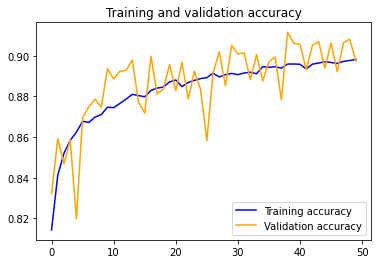

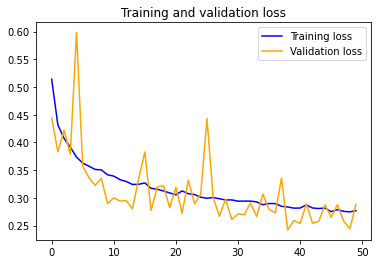

In [ ]:
accuracy = model_trained.history['accuracy']
val_accuracy = model_trained.history['val_accuracy']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color="orange")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color="orange")
plt.title('Training and validation loss')
plt.legend()
plt.show()

By looking at the above graphs we see that as the number of epochs are increasing both training and validation accuracies increases ( and are close ) , and the training and validation loss decreases ( values being close ) which signifies that the model is not overfitting.

Building the model with 3 layers

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(28,28,1)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))
 
model3.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))
 
model3.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
 
model3.add(Flatten())
 
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.1))
 
model3.add(Dense(10, activation='softmax'))


In [ ]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

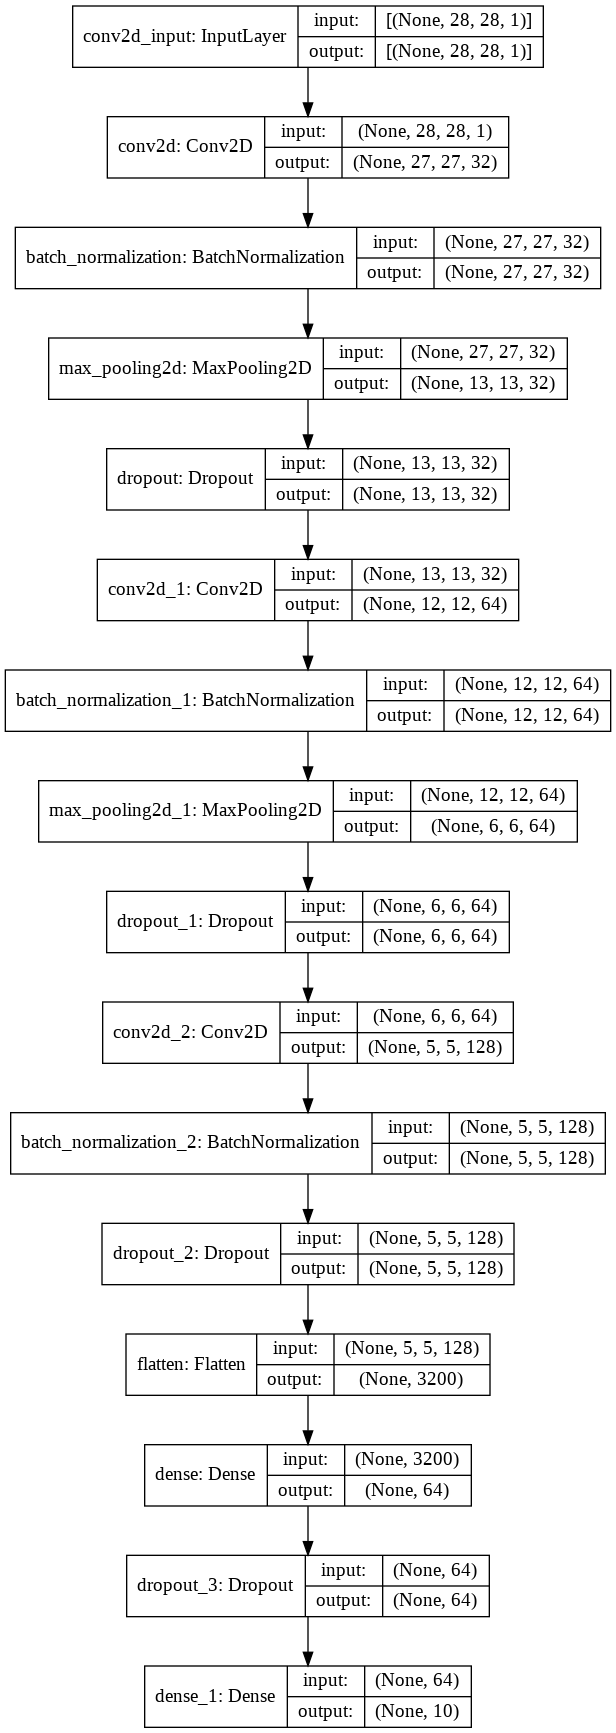

In [ ]:
plot_model(model3,show_shapes=True)

In [ ]:
model_trained3 = model3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
188/188 [==============================] - 57s 297ms/step - loss: 0.6934 - accuracy: 0.7585 - val_loss: 1.9658 - val_accuracy: 0.5374
Epoch 2/10
188/188 [==============================] - 55s 291ms/step - loss: 0.3399 - accuracy: 0.8747 - val_loss: 1.0424 - val_accuracy: 0.6793
Epoch 3/10
188/188 [==============================] - 55s 291ms/step - loss: 0.2809 - accuracy: 0.8980 - val_loss: 0.3911 - val_accuracy: 0.8569
Epoch 4/10
188/188 [==============================] - 55s 291ms/step - loss: 0.2521 - accuracy: 0.9053 - val_loss: 0.2562 - val_accuracy: 0.9044
Epoch 5/10
188/188 [==============================] - 54s 289ms/step - loss: 0.2348 - accuracy: 0.9106 - val_loss: 0.2644 - val_accuracy: 0.9041
Epoch 6/10
188/188 [==============================] - 54s 290ms/step - loss: 0.2109 - accuracy: 0.9210 - val_loss: 0.2335 - val_accuracy: 0.9161
Epoch 7/10
188/188 [==============================] - 54s 290ms/step - loss: 0.2001 - accuracy: 0.9238 - val_loss: 0.2522 - val_ac

In [ ]:
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:{}%'.format( round(score3[0]*100,4)))
print('Test accuracy:{}%'.format( round(score3[1]*100,4)))

Test loss:22.9211%
Test accuracy:91.98%


In [ ]:
gen3 = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches3 = gen3.flow(X_train, y_train, batch_size=256)
val_batches3 = gen3.flow(X_val, y_val, batch_size=256)

In [ ]:
# 50 epochs
model_trained3 = model3.fit(batches3, epochs=50,
                    validation_data=val_batches3)

Epoch 1/50
188/188 [==============================] - 69s 365ms/step - loss: 0.4227 - accuracy: 0.8439 - val_loss: 0.3754 - val_accuracy: 0.8589
Epoch 2/50
188/188 [==============================] - 68s 364ms/step - loss: 0.3656 - accuracy: 0.8648 - val_loss: 0.3347 - val_accuracy: 0.8757
Epoch 3/50
188/188 [==============================] - 68s 361ms/step - loss: 0.3433 - accuracy: 0.8734 - val_loss: 0.3806 - val_accuracy: 0.8517
Epoch 4/50
188/188 [==============================] - 68s 362ms/step - loss: 0.3224 - accuracy: 0.8789 - val_loss: 0.3098 - val_accuracy: 0.8846
Epoch 5/50
188/188 [==============================] - 68s 361ms/step - loss: 0.3193 - accuracy: 0.8793 - val_loss: 0.3364 - val_accuracy: 0.8760
Epoch 6/50
188/188 [==============================] - 68s 361ms/step - loss: 0.3093 - accuracy: 0.8844 - val_loss: 0.3276 - val_accuracy: 0.8784
Epoch 7/50
188/188 [==============================] - 68s 361ms/step - loss: 0.3030 - accuracy: 0.8859 - val_loss: 0.3080 - val_ac

In [ ]:
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:{}%'.format( round(score3[0]*100,4)))
print('Test accuracy:{}%'.format( round(score3[1]*100,4)))

Test loss:21.3169%
Test accuracy:92.61%


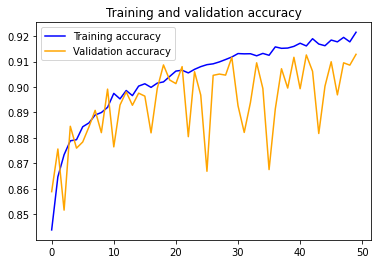

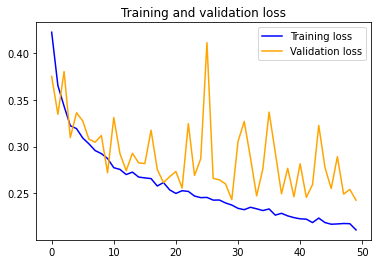

In [ ]:
accuracy = model_trained3.history['accuracy']
val_accuracy = model_trained3.history['val_accuracy']
loss = model_trained3.history['loss']
val_loss = model_trained3.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color="orange")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color="orange")
plt.title('Training and validation loss')
plt.legend()
plt.show()

By looking at the above graphs we see that as the number of epochs are increasing both training and validation accuracies increases ( and are close ) , and the training and validation loss decreases ( values being close ) which signifies that the model is not overfitting.

Building the model with 4 layers

In [ ]:
# Creating the CNN model with 4 layers
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model4.add(BatchNormalization())


model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model4.add(BatchNormalization())


model4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Flatten())

model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.1))

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.1))

model4.add(Dense(10, activation='softmax'))

In [ ]:
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0

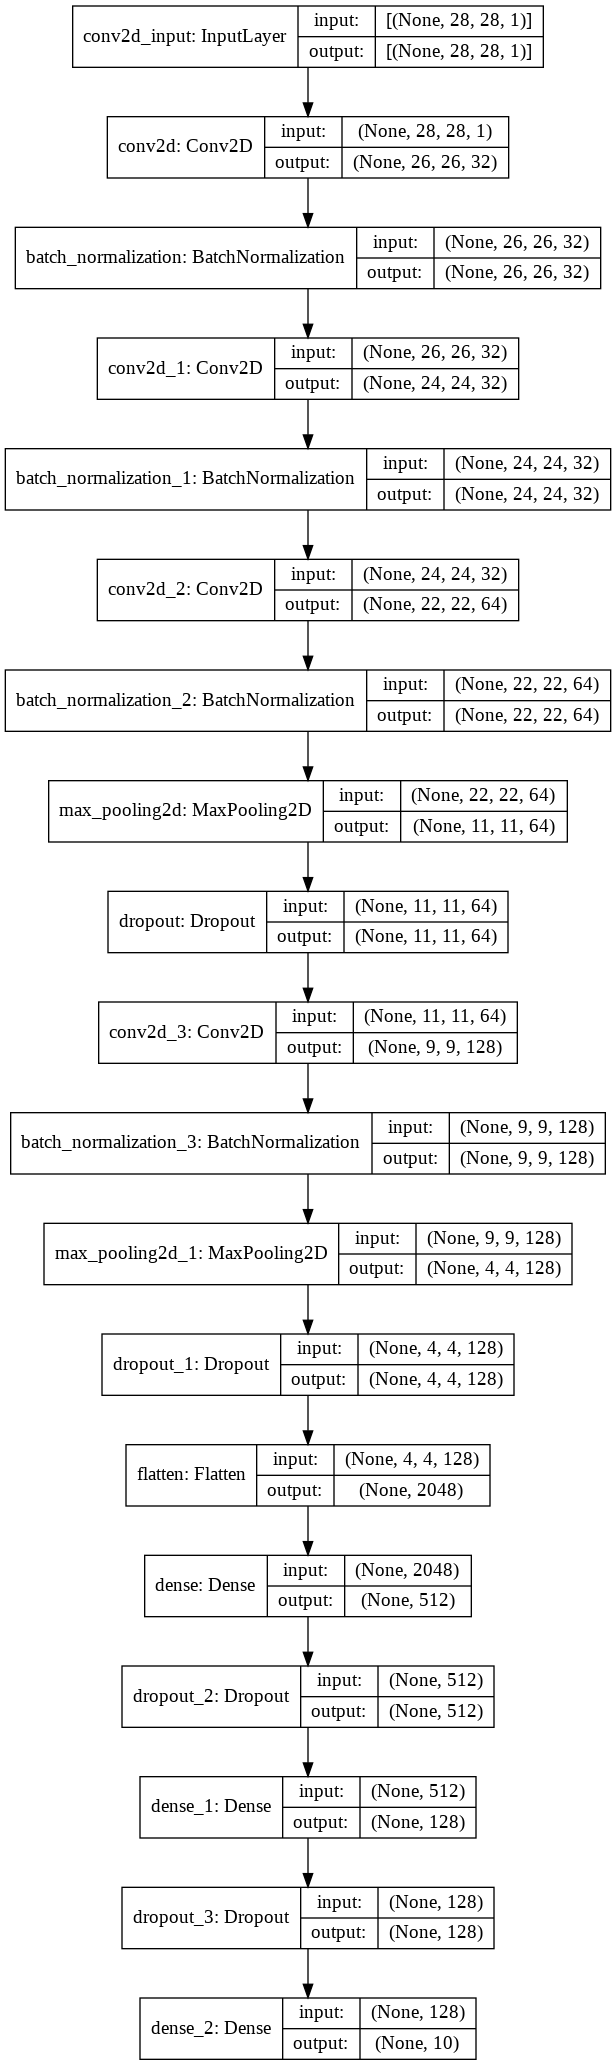

In [ ]:
plot_model(model4,show_shapes=True)

In [ ]:
model_trained4 = model4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
188/188 [==============================] - 227s 1s/step - loss: 0.8157 - accuracy: 0.7292 - val_loss: 3.5372 - val_accuracy: 0.1023
Epoch 2/10
188/188 [==============================] - 225s 1s/step - loss: 0.3233 - accuracy: 0.8816 - val_loss: 1.1215 - val_accuracy: 0.6307
Epoch 3/10
188/188 [==============================] - 225s 1s/step - loss: 0.2553 - accuracy: 0.9064 - val_loss: 0.3610 - val_accuracy: 0.8668
Epoch 4/10
188/188 [==============================] - 225s 1s/step - loss: 0.2171 - accuracy: 0.9206 - val_loss: 0.2503 - val_accuracy: 0.9093
Epoch 5/10
188/188 [==============================] - 225s 1s/step - loss: 0.1867 - accuracy: 0.9305 - val_loss: 0.2534 - val_accuracy: 0.9112
Epoch 6/10
188/188 [==============================] - 224s 1s/step - loss: 0.1650 - accuracy: 0.9378 - val_loss: 0.2514 - val_accuracy: 0.9168
Epoch 7/10
188/188 [==============================] - 224s 1s/step - loss: 0.1407 - accuracy: 0.9480 - val_loss: 0.2640 - val_accuracy: 0.9143

In [ ]:
score4 = model4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:{}%'.format( round(score4[0]*100,4)))
print('Test accuracy:{}%'.format( round(score4[1]*100,4)))

Test loss:28.8854%
Test accuracy:91.64%


In [ ]:
gen4 = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches4 = gen4.flow(X_train, y_train, batch_size=256)
val_batches4 = gen4.flow(X_val, y_val, batch_size=256)

In [ ]:
# 50 epochs
model_trained4 = model4.fit(batches4, epochs=50,
                    validation_data=val_batches4)

Epoch 1/50
188/188 [==============================] - 241s 1s/step - loss: 0.3739 - accuracy: 0.8655 - val_loss: 0.3456 - val_accuracy: 0.8758
Epoch 2/50
188/188 [==============================] - 240s 1s/step - loss: 0.3117 - accuracy: 0.8866 - val_loss: 0.3718 - val_accuracy: 0.8679
Epoch 3/50
188/188 [==============================] - 240s 1s/step - loss: 0.2905 - accuracy: 0.8932 - val_loss: 0.2992 - val_accuracy: 0.8920
Epoch 4/50
188/188 [==============================] - 240s 1s/step - loss: 0.2723 - accuracy: 0.9002 - val_loss: 0.2935 - val_accuracy: 0.8945
Epoch 5/50
188/188 [==============================] - 240s 1s/step - loss: 0.2649 - accuracy: 0.9036 - val_loss: 0.3197 - val_accuracy: 0.8879
Epoch 6/50
188/188 [==============================] - 240s 1s/step - loss: 0.2571 - accuracy: 0.9047 - val_loss: 0.2981 - val_accuracy: 0.8911
Epoch 7/50
188/188 [==============================] - 239s 1s/step - loss: 0.2449 - accuracy: 0.9090 - val_loss: 0.2685 - val_accuracy: 0.9021

In [ ]:
score4 = model4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:{}%'.format( round(score4[0]*100,4)))
print('Test accuracy:{}%'.format( round(score4[1]*100,4)))

Test loss:23.4501%
Test accuracy:93.49%


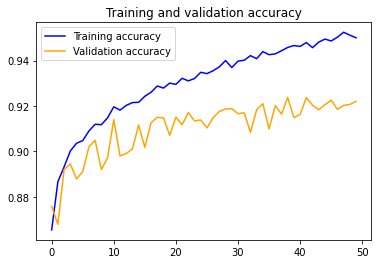

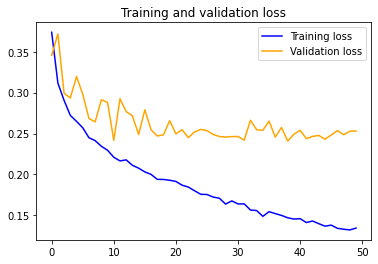

In [ ]:
accuracy = model_trained4.history['accuracy']
val_accuracy = model_trained4.history['val_accuracy']
loss = model_trained4.history['loss']
val_loss = model_trained4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy',color="orange")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color="orange")
plt.title('Training and validation loss')
plt.legend()
plt.show()

By looking at the above graphs we see that as the number of epochs are increasing both training and validation accuracies increases ( and are close ) , and the training and validation loss decreases ( values being close ) which signifies that the model is not overfitting.

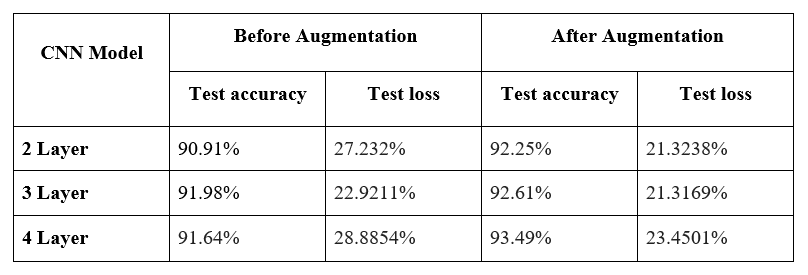

**Classification report**


---



* **Precision**: is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* **Recall**: is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* **F1-Score**:gives the harmonic mean of precision and recall.

* **Support**: number of occurrences of each class in y_true.

In [ ]:
y_pred = np.argmax(model4.predict(X_test.reshape(10000,28,28,1)),axis=1)
print(classification_report(test.iloc[:, 0],y_pred,target_names=list(labels.values())))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.89      0.88      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.93      0.88      0.90      1000
       Dress       0.94      0.94      0.94      1000
        Coat       0.92      0.90      0.91      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.77      0.83      0.80      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.98      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.94     10000
weighted avg       0.94      0.93      0.94     10000




Looking at the Precision of the Shirts, we can see that our model predicted 77% of Shirts correctly out of the total images it predicted as Shirts.

**Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm, labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=[10,10])
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

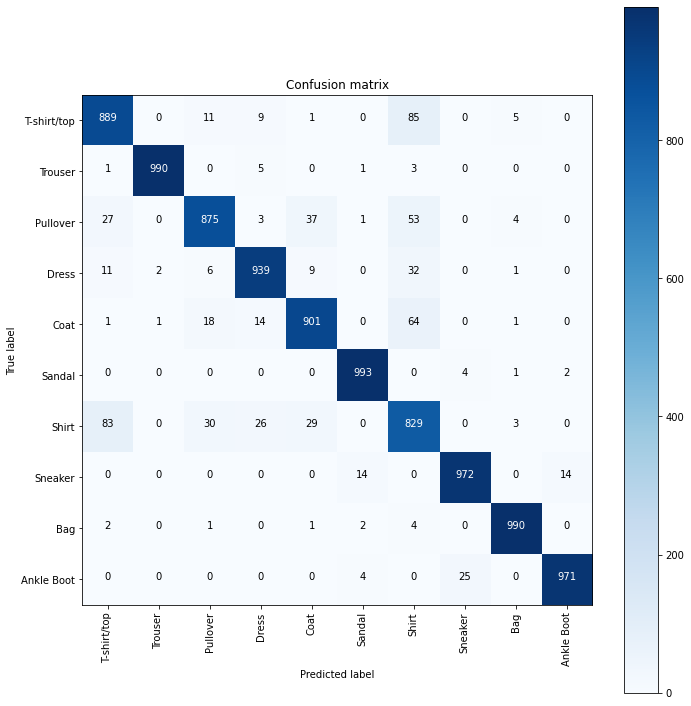

In [ ]:
# Predict the values from the validation dataset
Y_pred = model4.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx,list(labels.values()))

From the confusion matrix we can conclude that 85 T-shirt/top are misclassified as shirts.

**Displaying total number of correctly and incorrectly classified images**

In [ ]:
p = y_pred
p=pd.Series(p)

t=test.iloc[:, 0]
store=(p==t)
print(store)

0        True
1        True
2        True
3       False
4        True
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Length: 10000, dtype: bool


In [ ]:
correct, =np.where(store==True)
incorrect, =np.where(store==False)
count_list=store.value_counts().tolist()
print(count_list)

[9349, 651]


In [ ]:
print("Correct predicted classes:",count_list[0])
print("Incorrect predicted classes:",count_list[1])

Correct predicted classes: 9349
Incorrect predicted classes: 651


**Displaying correctly classified images in green color**

In [ ]:
def plot_images(data_index,cmap="Blues"):
    
    data_index=data_index.tolist()
    f, ax = plt.subplots(5,5, figsize=(15,15))
    
    for i,indx in enumerate(data_index[:25]):
        ax[i//5, i%5].imshow(X_test[indx].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{}  Pred:{}".format(labels[t[indx]],labels[y_pred[indx]]))
    plt.show()    

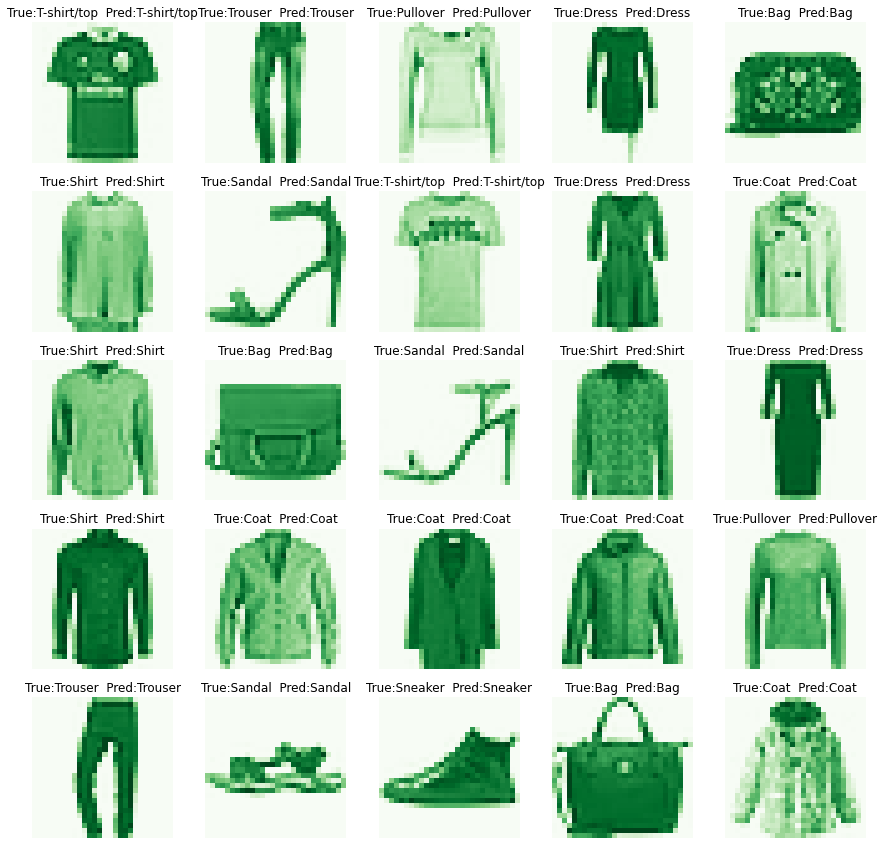

In [ ]:
plot_images(correct, "Greens")

**Displaying incorrectly classified images in red color**

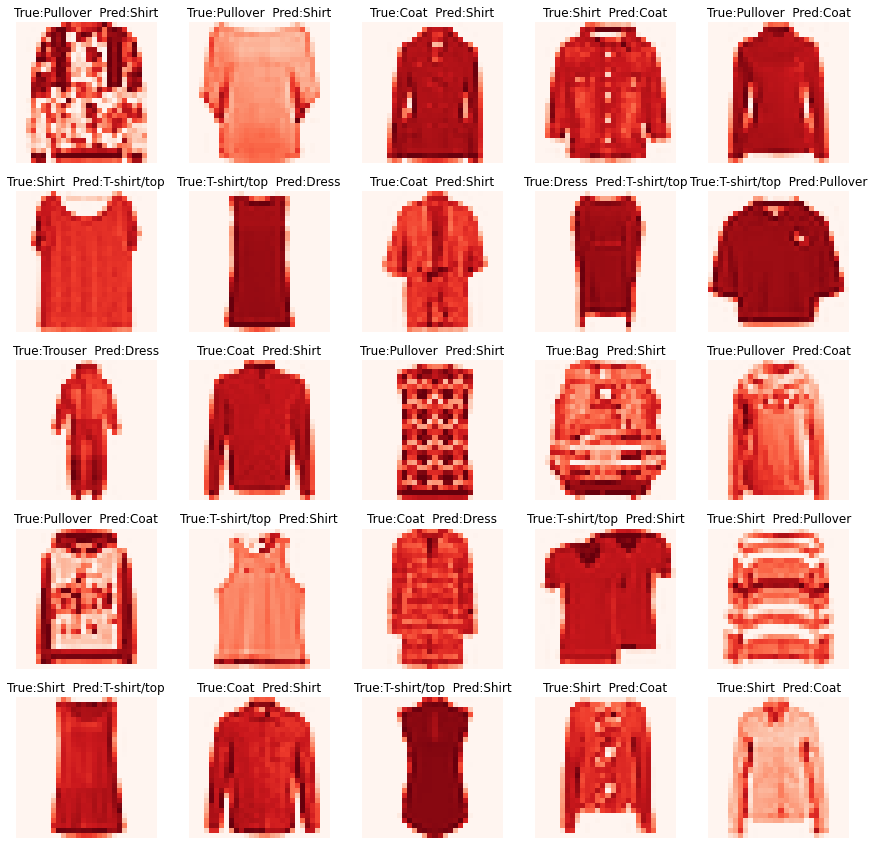

In [ ]:
plot_images(incorrect, "Reds")